In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("pp-2017.csv", names=['id','price','date','postcode','type','old/new','duration','paon','saon','street','locality','town/city','district','county','ppd','status'])
df["price"] = pd.to_numeric(df["price"])
filtered_df = df[df['postcode'].notnull()]
london_df = filtered_df.loc[(filtered_df['town/city'] == 'LONDON') & (filtered_df['type'].isin(['F','T','D','S']))]

In [3]:
london_distinct = london_df.groupby(['postcode','type'])['price'].mean().reset_index()
postcode = pd.read_csv("ukpostcodes.csv")
london = pd.merge(london_distinct, postcode, on="postcode")

In [65]:
np.min(london[['latitude']])

latitude    51.385573
dtype: float64

In [66]:
np.max(london[['latitude']])

latitude    51.665615
dtype: float64

In [67]:
np.max(london[['longitude']])

longitude    0.137295
dtype: float64

In [68]:
np.min(london[['longitude']])

longitude   -0.347077
dtype: float64

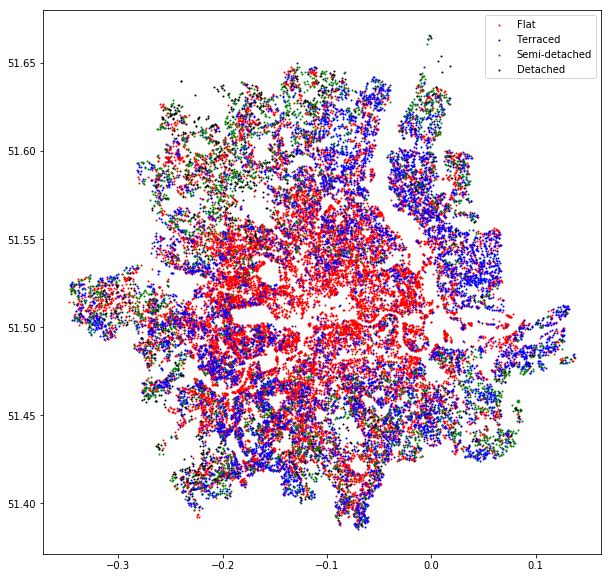

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
im = plt.imread('london.png')
#ax.imshow(im,extent=[-0.4, 0.2, 51.35, 51.7])

for property_type, color, typename in zip(['F','T','S','D'],['red','blue','green','black'],['Flat','Terraced','Semi-detached','Detached']):
    latlong = np.array(london[['latitude','longitude']].loc[london['type']==property_type])
    ax.scatter(latlong[:,1],latlong[:,0],color=color,s=1,label = typename)

ax.legend()
#plt.savefig('london-type.png',dpi=300)

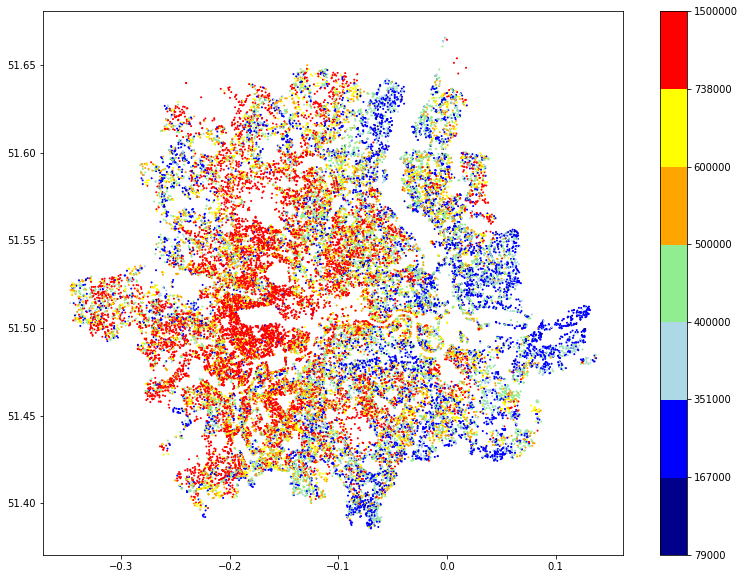

In [106]:
f, ax = plt.subplots(figsize=(13,10))
from matplotlib.colors import BoundaryNorm, ListedColormap

cmap = ListedColormap(["darkblue", "blue", "lightblue", "lightgreen","orange", "yellow", "red"])
bounds = [79000,167000,351000, 400000,500000,600000,738000,1500000]
norm = BoundaryNorm(bounds, cmap.N)

x,y,z = np.array(london['latitude']),np.array(london['longitude']),np.array(london['price'])
points = ax.scatter(y, x, c=z, s=1, cmap=cmap, norm=norm)
f.colorbar(points)

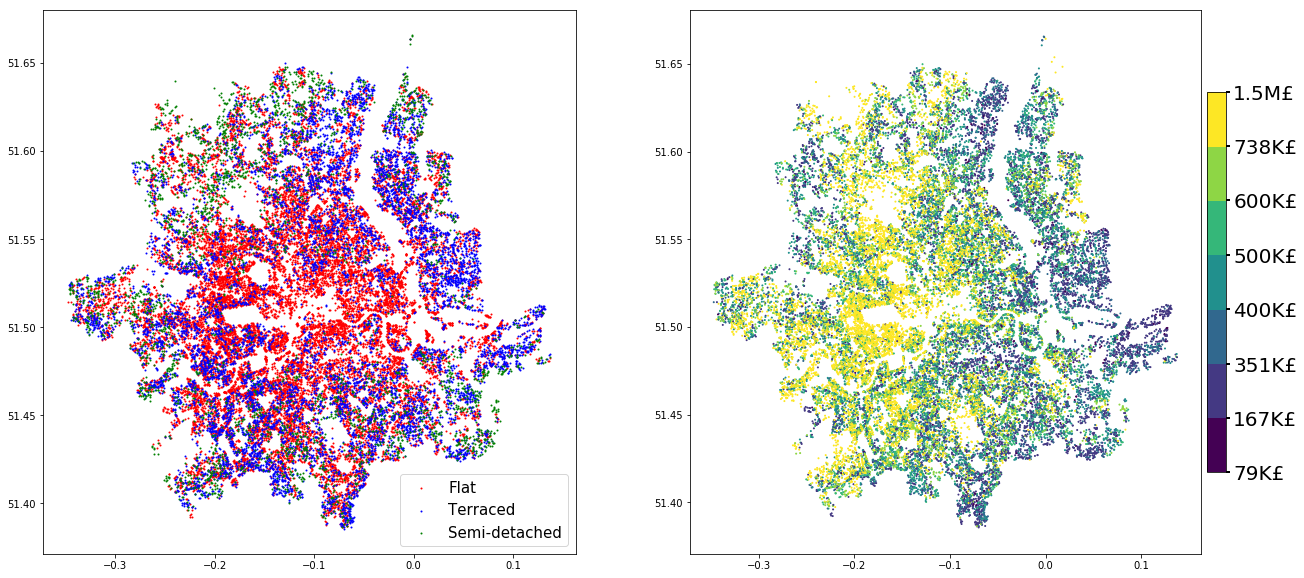

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib

f, (ax1,ax2) = plt.subplots(1,2,figsize=(22.5, 10),gridspec_kw={'width_ratios': [10.5, 12]})

for property_type, color, typename in zip(['F','T','S'],['red','blue','green','black'],['Flat','Terraced','Semi-detached','Detached']):
    latlong = np.array(london[['latitude','longitude']].loc[london['type']==property_type])
    ax1.scatter(latlong[:,1],latlong[:,0],color=color,s=1,label = typename)

ax1.legend(fontsize=15)


cmap = matplotlib.cm.viridis
bounds = [79000,167000,351000, 400000,500000,600000,738000,1500000]
norm = BoundaryNorm(bounds, cmap.N)

x,y,z = np.array(london['latitude']),np.array(london['longitude']),np.array(london['price'])
points = ax2.scatter(y, x, c=z, s=1, cmap=cmap, norm=norm)
cbar = f.colorbar(points, ticks=bounds,shrink=0.7, pad=0.01)
cbar.ax.set_yticklabels(['79K£', '167K£', '351K£','400K£','500K£','600K£','738K£','1.5M£'])
cbar.ax.tick_params(labelsize=20, width=2)
plt.show()
#plt.savefig('london-type-price.png',dpi=300)

In [40]:
london['price'] = np.log(london['price'])

In [46]:
# use pd.concat to join the new columns with your original dataframe
london_dummy = pd.concat([london,pd.get_dummies(london['type'], prefix='type')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
london_dummy.drop(['type','postcode','id'],axis=1, inplace=True)

In [47]:
london_dummy

,price,latitude,longitude,type_D,type_F,type_S,type_T
0,13.038982,51.510670,-0.052594,0,1,0,0
1,12.721886,51.511312,-0.053388,0,1,0,0
2,11.461632,51.513079,-0.054667,0,1,0,0
3,12.873902,51.510175,-0.061262,0,1,0,0
4,12.734247,51.510214,-0.054933,0,1,0,0
5,12.619837,51.510181,-0.057313,0,1,0,0
6,12.190959,51.512801,-0.049375,0,1,0,0
7,12.644328,51.510459,-0.052401,0,1,0,0
8,12.620365,51.511903,-0.048914,0,1,0,0
9,12.790766,51.512279,-0.048962,0,1,0,0


In [48]:
london_dummy.to_csv('london.csv')